In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("WMT.csv")
df = pd.DataFrame(data)
df.head(5)

,date,open,high,low,close,adjclose,volume,ticker
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600,AAPL
1,05-01-2010,7.664286,7.699643,7.616071,7.656429,6.507524,601904800,AAPL
2,06-01-2010,7.656429,7.686786,7.526786,7.534643,6.404016,552160000,AAPL
3,07-01-2010,7.562500,7.571429,7.466071,7.520714,6.392178,477131200,AAPL
4,08-01-2010,7.510714,7.571429,7.466429,7.570714,6.434672,447610800,AAPL


In [3]:
attributes = ['close','adjclose']
closing_price = data[attributes].values.reshape(-1,1)
# closing_price
normalize_data_scaler = MinMaxScaler(feature_range=(0,1))
normalized_data = normalize_data_scaler.fit_transform(closing_price)
# normalized_data

In [4]:
training_data, testing_data = train_test_split(normalized_data, test_size=0.25,shuffle=False,random_state=42)

In [5]:
def create_training_testing_dataset(dataset):
    X = []
    Y = []
    no_of_days_for_training_testing = 100
    for i in range(len(training_data) - no_of_days_for_training_testing):
        X.append(training_data[i:i + no_of_days_for_training_testing])
        Y.append(training_data[i + no_of_days_for_training_testing])
    return np.array(X),np.array(Y)

In [6]:
X_training, Y_training = create_training_testing_dataset(training_data)
X_testing, Y_testing = create_training_testing_dataset(testing_data)

In [7]:
input_shape = X_training.shape[1],X_training.shape[2] 
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=input_shape))
model.add(LSTM(units=50))
model.add(Dense(units=Y_training.shape[1]))

model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
model.fit(X_training, Y_training, epochs=50, batch_size=32)

Epoch 1/50
4632/4632 [==============================] - 170s 36ms/step - loss: 3.2557e-04
Epoch 2/50
4632/4632 [==============================] - 208s 45ms/step - loss: 3.9952e-05
Epoch 3/50
4632/4632 [==============================] - 170s 37ms/step - loss: 2.9043e-05
Epoch 4/50
4632/4632 [==============================] - 179s 39ms/step - loss: 2.6659e-05
Epoch 5/50
4632/4632 [==============================] - 172s 37ms/step - loss: 2.6579e-05
Epoch 6/50
4632/4632 [==============================] - 184s 40ms/step - loss: 2.5655e-05
Epoch 7/50
4632/4632 [==============================] - 176s 38ms/step - loss: 2.5966e-05
Epoch 8/50
4632/4632 [==============================] - 184s 40ms/step - loss: 2.5173e-05
Epoch 9/50
4632/4632 [==============================] - 176s 38ms/step - loss: 2.4751e-05
Epoch 10/50
4632/4632 [==============================] - 175s 38ms/step - loss: 2.4770e-05
Epoch 11/50
4632/4632 [==============================] - 175s 38ms/step - loss: 2.4677e-05
Epoch 12

In [13]:
predicted_prices = model.predict(X_testing)
# we need to undo the the scaling
predicted_prices = normalize_data_scaler.inverse_transform(predicted_prices)
Y_test = normalize_data_scaler.inverse_transform(Y_testing)

4632/4632 [==============================] - 58s 13ms/step


In [17]:
root_mean_square_error = np.sqrt(mse(Y_testing, predicted_prices))
print(root_mean_square_error)

122.13468904773232


[[0.00395869]
 [0.00177217]
 [0.00399315]
 ...
 [0.12420859]
 [0.11878686]
 [0.12182383]]


ValueError: x and y must have same first dimension, but have shapes (1,) and (148209, 1)

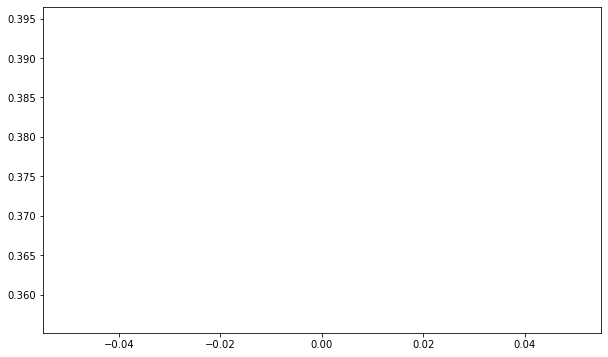

In [36]:
# print(Y_testing)
# pred_prices = np.array(predicted_prices)
# original_prices = np.array(normalize_data_scaler.inverse_transform(Y_testing))
# time_axis = np.arange(len(pred_prices))
# plt.figure(figsize=(10,6))
# plt.plot(time_axis, pred_prices, label='Predicted Prices')
# plt.plot(time_axis, original_prices, label='Original Prices')
# plt.xlabel('Time')
# plt.ylabel('Stock Prices')
# plt.title('Predicted Vs Original Stock Prices')
# plt.legend()
# plt.grid(True)
# plt.show()

In [23]:
no_of_days_for_training_testing = 100
recent_data = normalized_data[-no_of_days_for_training_testing :]
recent_data_normalized = normalize_data_scaler.transform(recent_data)
X_recent = np.array([recent_data_normalized])
X_recent = X_recent.reshape((X_recent.shape[0], X_recent.shape[1], X_recent.shape[2]))

next_day_predicted_price = model.predict(X_recent)
next_day_predicted_price = normalize_data_scaler.inverse_transform(next_day_predicted_price)
next_day_predicted_price = normalize_data_scaler.inverse_transform(next_day_predicted_price)
next_day_predicted_price

1/1 [==============================] - 0s 29ms/step


array([[212.28444]], dtype=float32)

In [27]:
upto_no_of_months_predicitons = 6
total_days = upto_no_of_months_predicitons*30

predicted_prices = []
recent_data = normalized_data[-no_of_days_for_training_testing :]
for _ in range(total_days):
    recent_data_normalized = normalize_data_scaler.transform(recent_data)
    X_recent = np.array([recent_data_normalized])
    X_recent = X_recent.reshape((X_recent.shape[0], X_recent.shape[1], X_recent.shape[2]))
    
    
    next_day_predicted_price = model.predict(X_recent)
    next_day_predicted_price = normalize_data_scaler.inverse_transform(next_day_predicted_price)
    
    predicted_prices.append(next_day_predicted_price[0][0])
    recent_data = np.append(recent_data[1:], next_day_predicted_price,axis=0)
    
    X_training, Y_training = create_training_testing_dataset(recent_data)
    model.fit(X_training, Y_training, epochs = 1, batch_size=32, verbose = 0)

1/1 [==============================] - 0s 20ms/step


KeyboardInterrupt: 